In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import json
import gzip
import seaborn as sns
from cache_to_disk import cache_to_disk

In [21]:
@cache_to_disk(n_days_to_cache=1)
def read_json(complete_path:str):

    #complete_path = f"{raw_dir}/{filename}"

    with gzip.open(complete_path, 'r') as fin:        #  gzip
        json_bytes = fin.read()                      #  bytes (i.e. UTF-8)
        
    json_str = json_bytes.decode('utf-8')            # string (i.e. JSON)
    data = json.loads(json_str) 
    
    target = np.array([data_list[1] for data_list in data["data"]])
    
    return target



In [63]:
def read_csv(complete_path:str):
    df = pd.read_csv(complete_path,index_col=0, encoding="utf-8")
    target = np.array(df.values)
    columns=df.columns
    return target, columns

In [25]:
e_form = read_json(complete_path="../old_data/matbench/mp_e_form/matbench_mp_e_form.json.gz")
gap = read_json(complete_path="../old_data/matbench/mp_gap/matbench_mp_gap.json.gz")
is_metal = read_json(complete_path="../old_data/matbench/mp_is_metal/raw/matbench_mp_is_metal.json.gz")



/home/harold/miniconda3/envs/chem/lib/python3.9/site-packages/seaborn/distributions.py:461: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/harold/miniconda3/envs/chem/lib/python3.9/site-packages/seaborn/distributions.py:462: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


<AxesSubplot:title={'center':'is_metal distribution '}, xlabel='is_metal', ylabel='Count'>

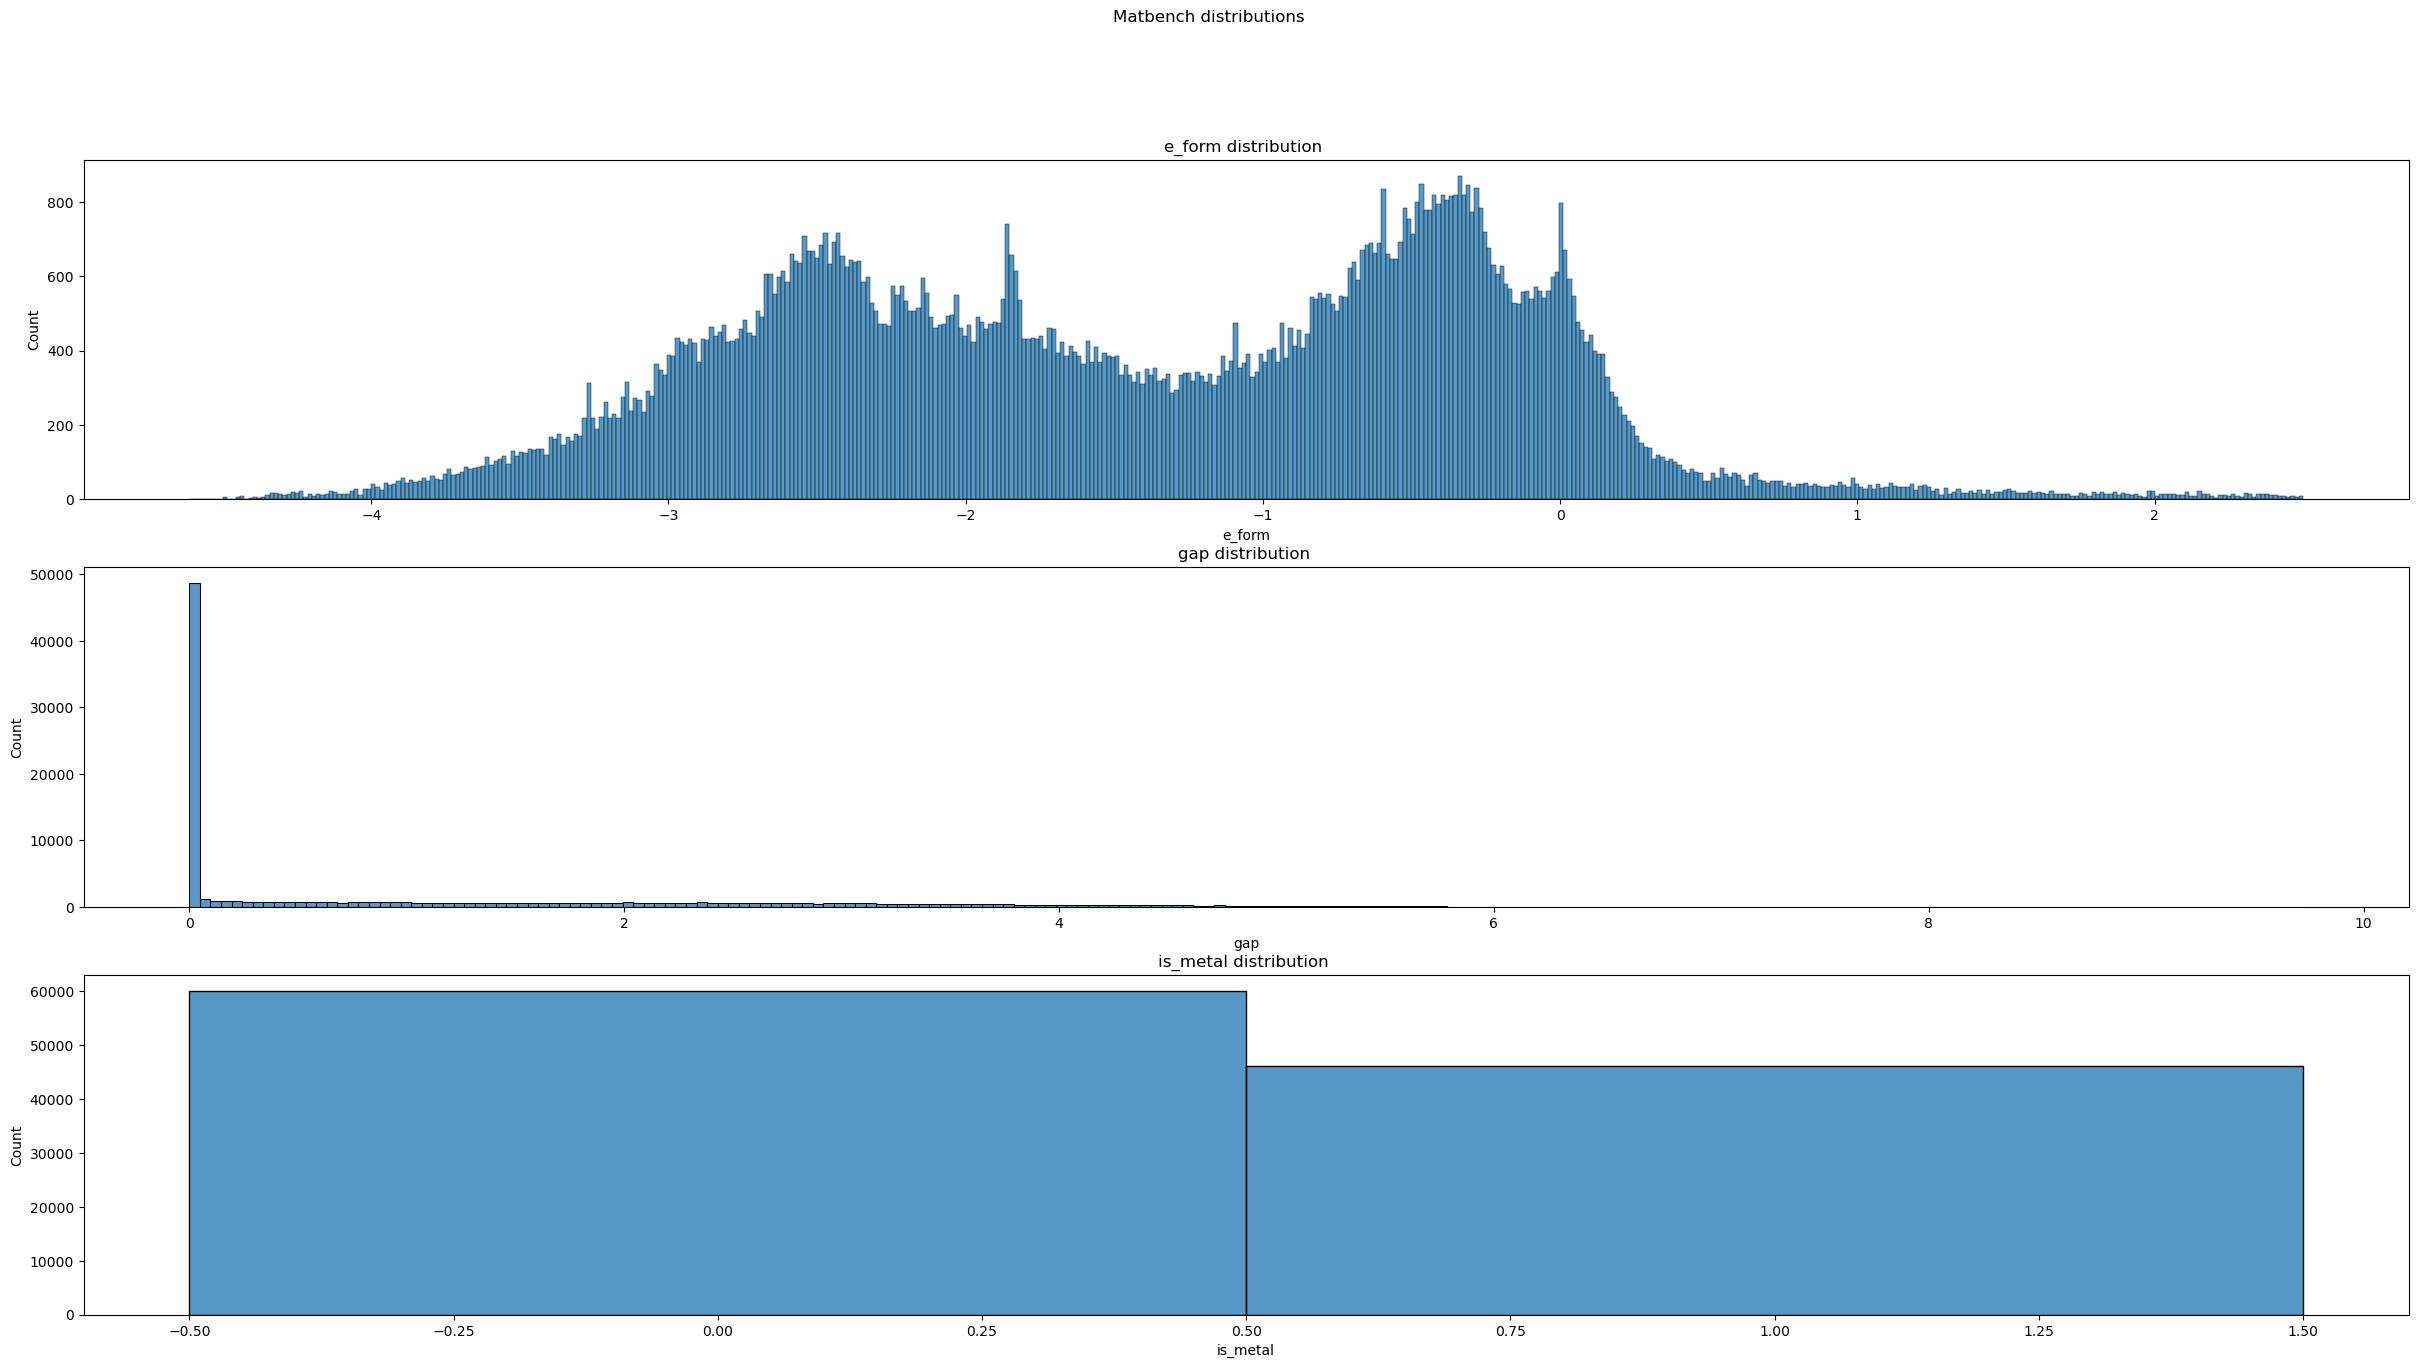

In [58]:
f,a = plt.subplots(3,1, figsize=(30,15))

f.suptitle("Matbench distributions")

ax=a[0]

ax.set_title("e_form distribution ")
ax.set_xlabel("e_form")

sns.histplot(e_form,bins=500, ax=ax)

ax=a[1]

ax.set_title("gap distribution ")
ax.set_xlabel("gap")

sns.histplot(gap,bins=200, ax=ax)


ax=a[2]


y= pd.Categorical(is_metal)

ax.set_title("is_metal distribution ")
ax.set_xlabel("is_metal")

sns.histplot(y, ax=ax)


In [72]:
qm9, columns = read_csv("../old_data/qm9/raw/qm9.csv")

df = pd.read_csv("../old_data/qm9/raw/qm9.csv").drop(columns="smiles")

In [73]:
df

,mu,alpha,homo,lumo,gap,r2,zpve,u0,u298,h298,g298,cv
0,0.0000,13.21,-0.3877,0.1171,0.5048,35.3641,0.044749,-40.478930,-40.476062,-40.475117,-40.498597,6.469
1,1.6256,9.46,-0.2570,0.0829,0.3399,26.1563,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316
2,1.8511,6.31,-0.2928,0.0687,0.3615,19.0002,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002
3,0.0000,16.28,-0.2845,0.0506,0.3351,59.5248,0.026841,-77.308427,-77.305527,-77.304583,-77.327429,8.574
4,2.8937,12.99,-0.3604,0.0191,0.3796,48.7476,0.016601,-93.411888,-93.409370,-93.408425,-93.431246,6.278
...,...,...,...,...,...,...,...,...,...,...,...,...
133880,1.6637,69.37,-0.2254,0.0588,0.2842,760.7472,0.127406,-400.633868,-400.628599,-400.627654,-400.663098,23.658
133881,1.2976,69.52,-0.2393,0.0608,0.3002,762.6354,0.127495,-400.629713,-400.624444,-400.623500,-400.658942,23.697
133882,1.2480,73.60,-0.2233,0.0720,0.2953,780.3553,0.140458,-380.753918,-380.748619,-380.747675,-380.783148,23.972
133883,1.9576,77.40,-0.2122,0.0881,0.3003,803.1904,0.152222,-364.720374,-364.714974,-364.714030,-364.749650,24.796


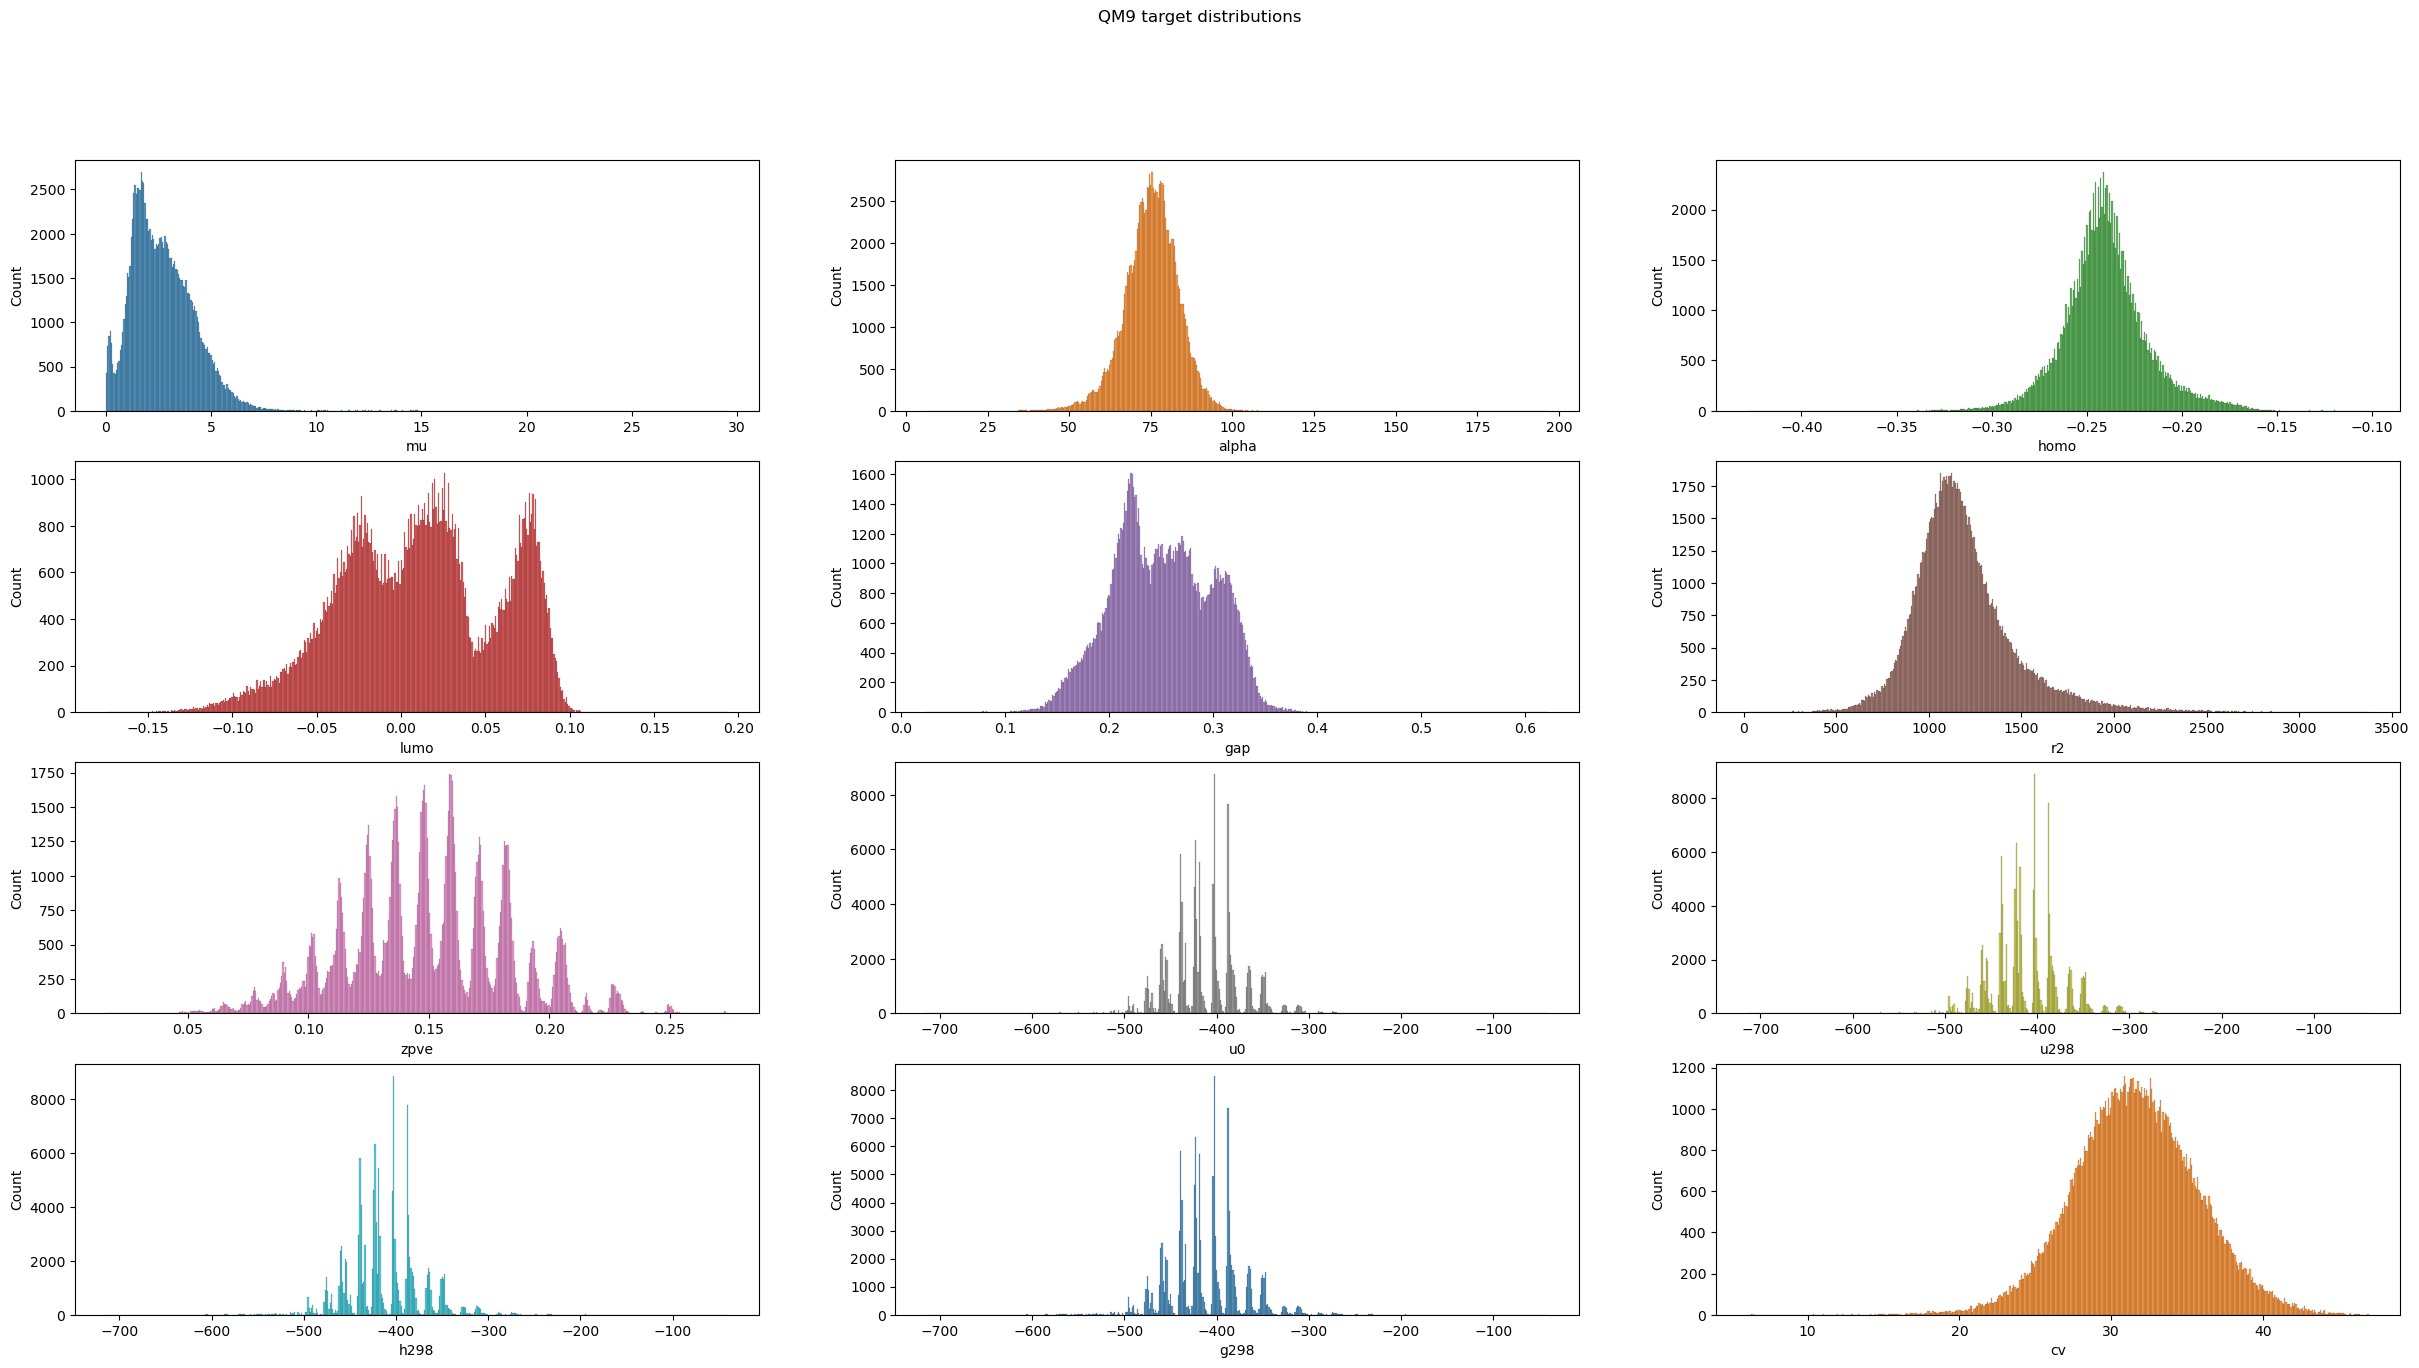

In [78]:
colors = plt.rcParams["axes.prop_cycle"]()


f,a = plt.subplots(4,3, figsize=(30,15))
plt.suptitle("QM9 target distributions")

for target, ax in zip(df.columns, a.flatten()):
    c = next(colors)["color"]
    sns.histplot(df[target], color=c,ax=ax, bins=500)
    #ax.set_title(target)

In [81]:
df["g298"].mode()

0    -459.014945
1    -450.176945
2    -439.154835
3    -439.154131
4    -439.111797
5    -439.103396
6    -439.091870
7    -424.261883
8    -424.256374
9    -424.251754
10   -424.226246
11   -424.217270
12   -424.215376
13   -423.039312
14   -423.035145
15   -423.031931
16   -418.110176
17   -418.107767
18   -403.144734
19   -401.935258
20   -400.747240
21   -388.327988
22   -387.092413
23   -378.811015
Name: g298, dtype: float64